In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import pandas as pd

import networkit as nk
from benji_girgs import fitting, utils, generation, plotting

import seaborn as sns
import powerlaw
import matplotlib.pyplot as plt
import inspect
import powerlaw
import glob

from girg_sampling import girgs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import tqdm

PrintBlocker = utils.HiddenPrints

import seaborn as sns


In [ ]:


data_dir = '/cluster/home/bdayan/girgs/FE_FB_Min_Mixed/'


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np


In [102]:
import importlib
importlib.reload(generation)

<module 'benji_girgs.generation' from '../benji_girgs/generation.py'>

In [113]:
n = 1000
d = 2
tau = 2.6
alpha=1.1
desiredAvgDegree = 10.0


g, edges, weights, pts, const_in = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=generation.PointsTorus2)

const_in: 0.7134493689239397


In [114]:
quick_expected_degree_func(weights, alpha, const_in)

4993.778094751152

In [115]:
nk.overview(g)

Network Properties:
nodes, edges			1000, 4924
directed?			False
weighted?			False
isolated nodes			7
self-loops			0
density				0.009858
clustering coefficient		0.228812
min/max/avg degree		0, 141, 9.848000
degree assortativity		-0.058490
number of connected components	8
size of largest component	993 (99.30 %)


In [39]:
foo = np.arange(25).reshape(5, 5)
foo**2

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361],
       [400, 441, 484, 529, 576]])

In [94]:
def quick_expected_degree_func(weights, alpha, c):
    cross = np.outer(weights, weights)
    W = np.sum(weights)
    cross = cross/W
    bad = cross > c**(-1/alpha)
    np.fill_diagonal(cross, 0.0)
    out = (c**(1/alpha)) * cross * (1 + 1/(alpha - 1)) - (1 / (alpha - 1)) * c * (cross ** alpha)
    out[bad] = 1.0
    return out.sum()/2

In [13]:
c = 1.0
cross = np.outer(weights, weights)
W = np.sum(weights)
cross = cross/W
np.fill_diagonal(cross, 0.0)
out = (c**(1/alpha)) * cross * (1 + 1/(alpha - 1)) - (1 / (alpha - 1)) * c * (cross ** alpha)

In [14]:
cross

array([[0.        , 0.00015986, 0.00015679, ..., 0.00219193, 0.00022012,
        0.00033554],
       [0.00015986, 0.        , 0.00014885, ..., 0.00208098, 0.00020898,
        0.00031856],
       [0.00015679, 0.00014885, 0.        , ..., 0.00204095, 0.00020496,
        0.00031243],
       ...,
       [0.00219193, 0.00208098, 0.00204095, ..., 0.        , 0.00286537,
        0.00436792],
       [0.00022012, 0.00020898, 0.00020496, ..., 0.00286537, 0.        ,
        0.00043864],
       [0.00033554, 0.00031856, 0.00031243, ..., 0.00436792, 0.00043864,
        0.        ]])

In [15]:
cross.sum()

7262.960909787414

  0%|          | 0/10 [00:00<?, ?it/s]../benji_girgs/generation.py:66: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(outer, dists**d)
100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


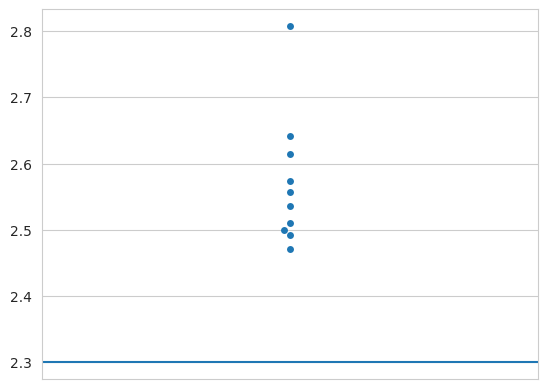

In [9]:
n = 2000
d = 2
tau = 2.3
alpha=50.0
desiredAvgDegree = None

def quick_get_alphas(n, d, tau, alpha, desiredAvgDegree, num=10):
    outs = []
    for _ in tqdm.tqdm(range(num)):
        g, edges, weights, pts, const = generation.generate_GIRG_nk(n, d, tau, alpha, const=1.0)
        dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
        with PrintBlocker():
            fit = powerlaw.Fit(dd)
        outs.append((alpha, fit.power_law.alpha))
        
    sns.swarmplot([x[1] for x in outs])
    plt.axhline(tau)

    
        
    return outs

outs = quick_get_alphas(n, d, tau, alpha, desiredAvgDegree, num=10)
# sorted([x[1] for x in outs])

In [ ]:
n = 2000
d = 2
tau = 2.3
alpha=1.5
desiredAvgDegree = None

def quick_get_alphas(n, d, tau, alpha, desiredAvgDegree, num=10):
    outs = []
    for _ in tqdm.tqdm(range(num)):
        g, edges, weights, pts, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree)
        dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
        with PrintBlocker():
            fit = powerlaw.Fit(dd)
        outs.append((alpha, fit.power_law.alpha))
        
    sns.swarmplot([x[1] for x in outs])
    plt.axhline(tau)

    
        
    return outs

outs = quick_get_alphas(n, d, tau, alpha, desiredAvgDegree, num=10)
# sorted([x[1] for x in outs])

In [6]:
outs2 = []
for n in [1000, 2000, 4000]:
    print(n)
    outs = []
    for _ in range(5):
        d = 2
        tau = 2.1
        alpha=1.5
        g, edges, weights, pts, const = generation.generate_GIRG_nk(n, d, tau, alpha, const=1.0)
        g = utils.get_largest_component(g)

        with PrintBlocker():
            dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
            fit = powerlaw.Fit(dd, discrete=True)
        outs.append(fit.power_law.alpha)
    print(np.mean(outs))
    outs2.append(outs)


1000


../benji_girgs/generation.py:66: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(outer, dists**d)


2.3215277671064536
2000
2.317940173164769
4000
2.3126328006505257


100%|██████████| 10/10 [00:02<00:00,  3.82it/s]


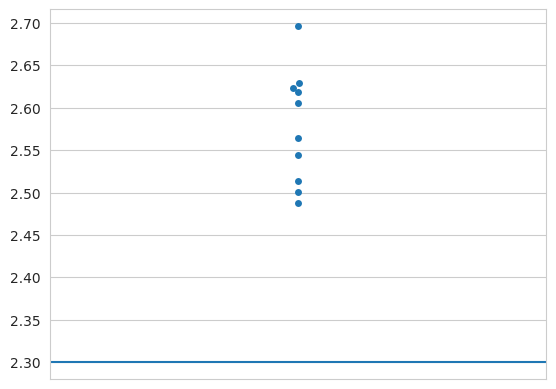

In [25]:
outs = quick_get_alphas(1000, d, tau, alpha, desiredAvgDegree, num=10)

100%|██████████| 10/10 [00:02<00:00,  3.97it/s]


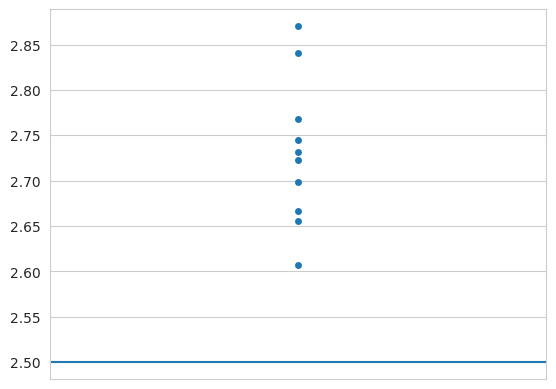

In [53]:
outs = quick_get_alphas(1000, d, 2.5, alpha, None, num=10)

100%|██████████| 5/5 [00:08<00:00,  1.74s/it]


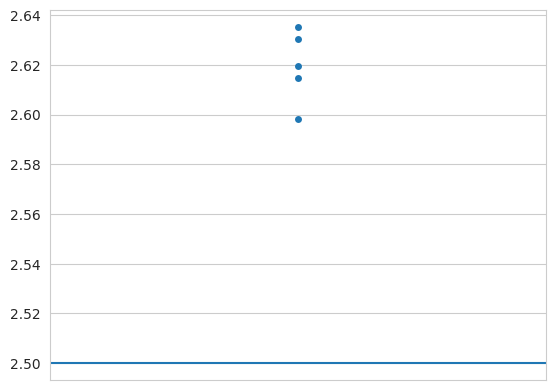

In [23]:
outs = quick_get_alphas(5000, d, 2.5, alpha, desiredAvgDegree, num=5)

100%|██████████| 5/5 [01:09<00:00, 13.82s/it]


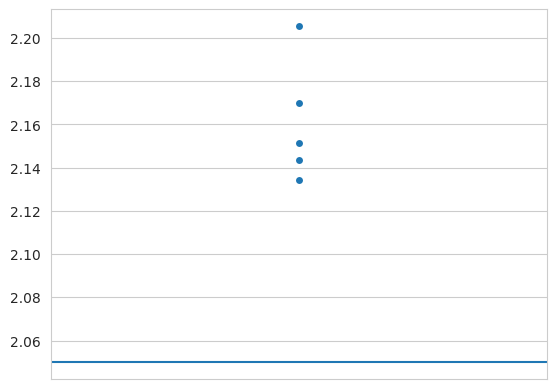

In [21]:
outs = quick_get_alphas(20000, d, 2.05, alpha, desiredAvgDegree, num=5)

In [7]:
dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
fit = powerlaw.Fit(dd, discrete=True)

Calculating best minimal value for power law fit


In [8]:
fit.power_law.alpha

2.490571866461183

Calculating best minimal value for power law fit
Network Properties:
nodes, edges			20000, 199107
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.000996
clustering coefficient		0.396199
min/max/avg degree		2, 6746, 19.910700
degree assortativity		-0.031939
number of connected components	1
size of largest component	20000 (100.00 %)
Calculating best minimal value for power law fit
powerlaw alpha: 2.961


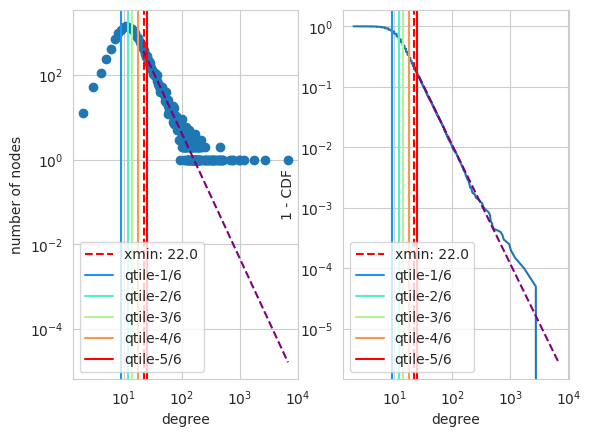

In [58]:
n = 20000
d = 1
tau = 2.9
alpha=1.5
desiredAvgDegree = 20.0

g, edges, weights, pts, const = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree)

dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
fit = powerlaw.Fit(dd, discrete=True)


nk.overview(g)
plotting.plot_degree_dist(g, pl_fit=True, vlines=6)

In [32]:
tau = 2.2
ws = np.arange(1, 1000)

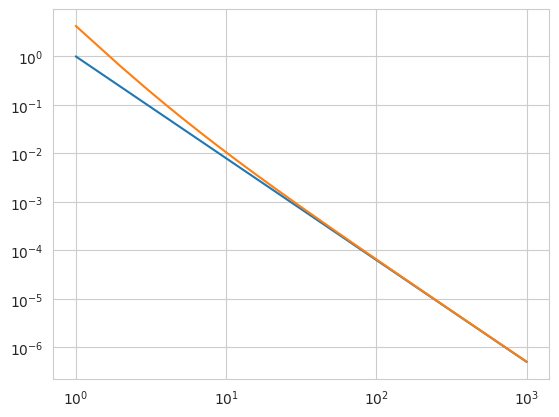

In [54]:
plt.plot(ws, ws**(-tau))
plt.plot(ws, ws**(-tau) + 0.5*(tau*(tau+1)) * ws**(-tau-1))
# plt.plot(ws, 0.5*(tau*(tau+1))*ws**(-tau-0.6))
plt.yscale('log')
plt.xscale('log')

In [91]:
import importlib
importlib.reload(generation)

<module 'benji_girgs.generation' from '../benji_girgs/generation.py'>

In [ ]:
outs2 = []
for n in [1000, 2000, 4000, 8000, 15000, 25000, 40000, 60000, 80000]:
    print(n)
    outs = []
    for _ in range(3):
        d = 2
        tau = 2.1
        alpha=1.5
        g, edges, weights, pts, const = generation.generate_GIRG_nk(n, d, tau, alpha, const=1.0)
        g = utils.get_largest_component(g)

        with PrintBlocker():
            dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
            fit = powerlaw.Fit(dd, discrete=True)
        outs.append(fit.power_law.alpha)
    print(np.mean(outs))
    outs2.append(outs)


1000
2.30736341434034
2000
2.3306097689420917
4000
2.2502119797496705
8000
2.258545363401455
15000


In [88]:
outs2 = []
for n in [1000, 2000, 4000, 8000, 15000, 25000, 40000, 60000, 80000]:
    print(n)
    outs = []
    for _ in range(3):
        d = 2
        tau = 2.1
        alpha=1.5
        g, edges, weights, pts, const = generation.cgirg_gen(n, d, tau, alpha, const=1.0)
        g = utils.get_largest_component(g)

        with PrintBlocker():
            dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
            fit = powerlaw.Fit(dd, discrete=True)
        
        outs.append(fit.power_law.alpha)
    
    print(np.mean(outs))
        
    outs2.append(outs)


1000
2.349508472411172
2000
2.379049253380869
4000
2.2624449036419496
8000
2.199521833615389
15000
2.206287069506089
25000
2.191885262251782
40000
2.178211585363813
60000
2.169810326480883
80000
2.1725445220603574


In [89]:
outs2 = []
for n in [150000, 250000, 400000, 650000]:
    print(n)
    outs = []
    for _ in range(3):
        d = 2
        tau = 2.1
        alpha=1.5
        g, edges, weights, pts, const = generation.cgirg_gen(n, d, tau, alpha, const=1.0)
        g = utils.get_largest_component(g)

        with PrintBlocker():
            dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
            fit = powerlaw.Fit(dd, discrete=True)
        
        outs.append(fit.power_law.alpha)
    
    print(np.mean(outs))
        
    outs2.append(outs)


150000
2.181832351274361
250000
2.169593703650222
400000
2.1680699722560077
650000


KeyboardInterrupt: 

In [ ]:
outs2 = []
for n in [150000]:
    print(n)
    outs = []
    for _ in range(3):
        d = 2
        tau = 2.1
        alpha=1.5
        desiredAvgDegree = 20.0

        g, edges, weights, pts, const = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree)
        g = utils.get_largest_component(g)

        with PrintBlocker():
            dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
            fit = powerlaw.Fit(dd, discrete=True)
        
        outs.append(fit.power_law.alpha)
    
    print(np.mean(outs))
        
    outs2.append(outs)


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data

<AxesSubplot: >

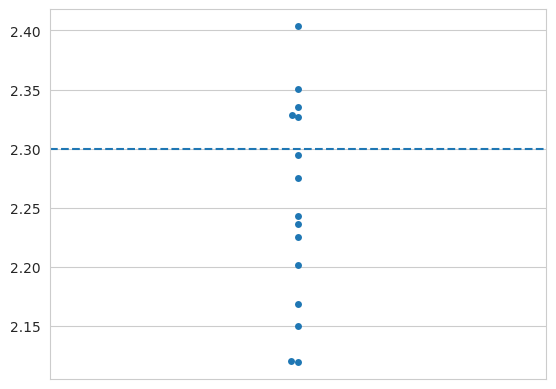

In [72]:
fits = []

for _ in range(15):
    weights = generation.generateWeights(1000, 2.3)
    
    gen = nk.generators.ChungLuGenerator(weights)
    g = gen.generate()
    
    dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
    with PrintBlocker():
        fit = powerlaw.Fit(dd, discrete=True)
    
    fits.append(fit.power_law.alpha)


sns.swarmplot(fits)
plt.axhline(2.3, ls='--')


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
powerlaw alpha: 2.092


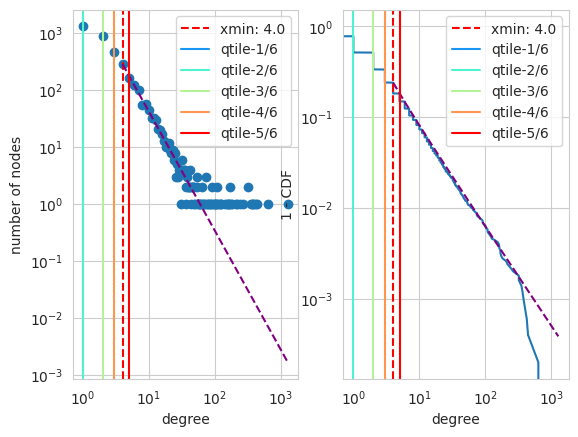

In [87]:
weights = generation.generateWeights(5000, 2.1)

gen = nk.generators.ChungLuGenerator(weights)
g = gen.generate()

plotting.plot_degree_dist(g, pl_fit=True, vlines=6)

In [70]:
gen = nk.generators.ChungLuGenerator(weights)
g = gen.generate()


In [ ]:
outs2 = []
for n in [1000, 2000, 4000, 8000, 15000, 25000, 40000, 60000, 80000]:
    print(n)
    outs = []
    for _ in range(3):
        d = 2
        tau = 2.1
        alpha=1.5
        desiredAvgDegree = 20.0

        g, edges, weights, pts, const = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree)
        g = utils.get_largest_component(g)

        with PrintBlocker():
            dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
            fit = powerlaw.Fit(dd, discrete=True)
        
        outs.append(fit.power_law.alpha)
    
    print(np.mean(outs))
        
    outs2.append(outs)
